## Python Scientific Stack


* [Numpy](http://www.numpy.org/) - Numerical Computation Library
* [Jupyter Notebook](http://jupyter.org/) - Rich Interactive Interface for reproducible research
* [Pandas](https://pandas.pydata.org/) - Data Analysis
* [Matplotlib](https://matplotlib.org/) - Plotting Package
* [Scipy](https://www.scipy.org/) - Scientific Computing
* [Scikit-Learn](http://scikit-learn.org/) - Machine Learning
* [Tensorflow](https://www.tensorflow.org/) - Deep Learning Framework supported by Google
* [PyTorch](https://pytorch.org/) - Deep Learning Framework supported by Facebook
* Many more

In [1]:
import pandas as pd    # Import Pandas
import numpy as np     # Import Numpy, 
import seaborn as sns  # Import Seaborn, visualisation library
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Data Preprocessing

### Motivating Example

Let's look at another dataset

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

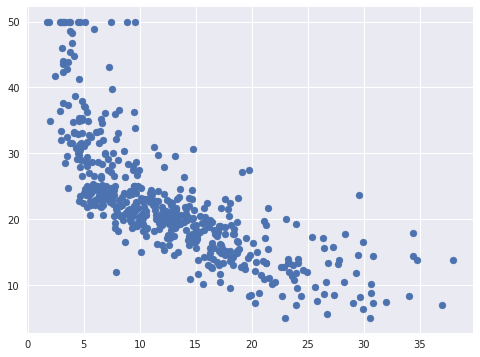

In [3]:
X = df[['LSTAT']].values    # only looking at one feature
y = boston_data.target
plt.figure(figsize=(8,6))
plt.scatter(X, y);

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

Algorithms, be it Machine or Deep Learning algorithms work best when they have a mean of 0 and standard deviation of 1.

This is what it looks like before and after scaling

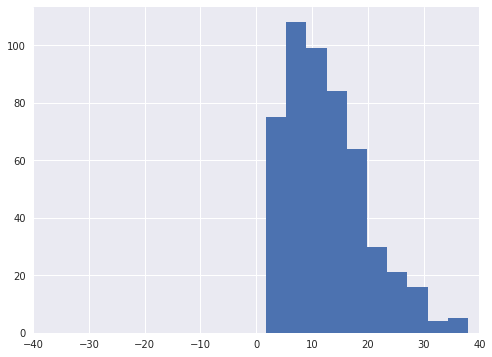

In [5]:
plt.figure(figsize=(8,6))
plt.hist(X);
plt.xlim(-40, 40);

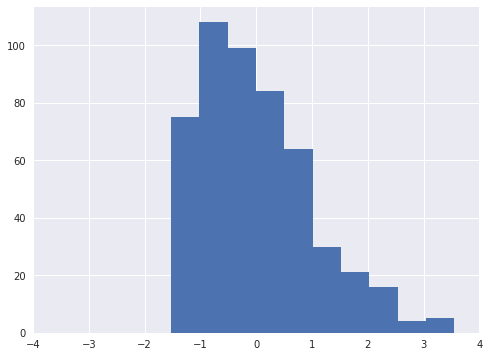

In [6]:
plt.figure(figsize=(8,6))
plt.hist(X_std);
plt.xlim(-4, 4);

### Various Pre-processing Methods

#### Introduction

* Standardization / Mean Removal

* Min-Max or Scaling Features to a Range

* Normalization

* Binarization

**Assumptions of Machine Learning Algoritms**:

* Implicit/explicit assumption of machine learning algorithms: The features follow a normal distribution.
* Most method are based on linear assumptions
* Most machine learning requires the data to be standard normally distributed. Gaussian with zero mean and unit variance.

***

[For scikit-learn documentation:](http://scikit-learn.org/stable/modules/preprocessing.html) In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) **assume that all features are centered around zero and have variance in the same order**. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.



#### Standardization / Mean Removal / Variance Scaling


[scikit Scale](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

Mean is removed. Data is centered on zero. This is to remove bias.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. "standard normal" random variable with mean 0 and standard deviation 1.

$$X'=\frac{X-\bar{X}}{\sigma}$$

In [7]:
from sklearn import preprocessing

In [8]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [9]:
X_train.mean(axis=0)    # axis=0 means column-wise; axis=1 means row-wise

array([1.        , 0.        , 0.33333333])

In [10]:
X_scaled = preprocessing.scale(X_train)

In [11]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Scaled data has zero mean and unit variance:

In [12]:
X_scaled.mean(axis=0)    # mean = 0

array([0., 0., 0.])

In [13]:
X_scaled.std(axis=0)     # unit variance, also known as variance = 1

array([1., 1., 1.])

Keeping in mind that if you have scaled your training data, you must do likewise with your test data as well. However, your assumption is that the mean and variance must be invariant between your train and test data. `scikit-learn` assists with a built-in utility function `StandardScaler`.

In [14]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [15]:
scaler = preprocessing.StandardScaler().fit(X_train)    # fit the training data
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [17]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [18]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

You can now utilise the `transform` for new dataset

In [19]:
X_test = [[-1., 1., 0.]]

In [20]:
scaler.transform(X_test)    # only transform was performed.

array([[-2.44948974,  1.22474487, -0.26726124]])

No fitting is done / perform on the test data. Only transform is performed on the test data

***

#### Min-Max or Scaling Features to a Range



Scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

**MinMaxScaler**

Scale a data to the `[0, 1]` range:

In [21]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [23]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Now apply this to unseen data

In [24]:
X_test = np.array([[-3.,  -1., 0.], 
                   [2.,  1.5,  4.]])
X_test

array([[-3. , -1. ,  0. ],
       [ 2. ,  1.5,  4. ]])

In [25]:
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  0.33333333],
       [ 1.        ,  1.25      ,  1.66666667]])

scikit-learn doc:

Init signature: preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)

Transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, i.e. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    
$$X_{std}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

$$X'=X_{std} (\text{max} - \text{min}) + \text{min}$$

#### MaxAbsScaler



Works in a very similar fashion, but scales in a way that the training data lies within the range `[-1, 1]` by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [26]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [27]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs 

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [28]:
X_test = np.array([[ -1., -0.5,  2.], [0., 0.5, -0.6]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs  

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

#### Scaling sparse data

Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. 

However, it can make sense to scale sparse inputs, especially if features are on different scales.

`MaxAbsScaler` and `maxabs_scale` were specifically designed for scaling sparse data

[Compare the effect of different scalers on data with outliers](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

#### Scaling vs Whitening

It is sometimes not enough to center and scale the features independently, since a downstream model can further make some assumption on the linear independence of the features.

To address this issue you can use `sklearn.decomposition.PCA` or `sklearn.decomposition.RandomizedPCA` with `whiten=True` to further remove the linear correlation across features.

***

#### Normalization

Normalization is the process of scaling individual samples to have unit norm. 

What is unit norm? Either sum of absolute is 1 for each row (L1) or sum of squares for each row is 1 (L2).

This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

$$X'=\frac{X-X_{mean}}{X_{max}-X_{min}}$$

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

There are two types of Normalization

  1. **L1 normalization**, Least Absolute Deviations
Ensure the sum of absolute values is 1 in each row. 

  2. **L2 normalization**, Least squares, 
Ensure that the sum of squares is 1.

In [29]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized    

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

Alternatively

The `preprocessing` module further provides a utility class `Normalizer` that implements the same operation using the `Transformer` API.

In [30]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer(copy=True, norm='l2')

In [31]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [32]:
normalizer.transform([[-1.,  1., 0.]])  

array([[-0.70710678,  0.70710678,  0.        ]])

#### Binarization


$$f(x)={0,1}$$

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution


It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

In [33]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer(copy=True, threshold=0.0)

In [34]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Modifying the threshold

In [35]:
binarizer = preprocessing.Binarizer(threshold=-0.5)

In [36]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.]])

***

#### Encoding categorical features

[LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [37]:
source = ['jakarta', 'singapore', 'bangkok', 'new york']

In [38]:
le = preprocessing.LabelEncoder()
src = le.fit_transform(source)

In [39]:
print("country to code mapping:\n") 
for k, v in enumerate(le.classes_):  print(v,'\t', k) 

country to code mapping:

bangkok 	 0
jakarta 	 1
new york 	 2
singapore 	 3


In [40]:
test_data = ['new york', 'singapore', 'jakarta']
result = le.transform(test_data) 
print(result)

[2 3 1]


#### One Hot / One-of-K Encoding



* Useful for dealing with sparse matrix
* uses [one-of-k scheme](http://code-factor.blogspot.sg/2012/10/one-hotone-of-k-data-encoder-for.html)


The process of turning a series of categorical responses into a set of binary result (0 or 1)

[One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [41]:
source

['jakarta', 'singapore', 'bangkok', 'new york']

In [42]:
src

array([1, 3, 0, 2])

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
one_hot_enc = OneHotEncoder(sparse=False)
src = src.reshape(len(src), 1)
print(src)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[1]
 [3]
 [0]
 [2]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [46]:
invert_res = le.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

['jakarta']


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
one_hot

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [48]:
one_hot[0, :]    # select the first row of one_hot

array([0., 1., 0., 0.])

In [49]:
invert_res = le.inverse_transform([np.argmax(one_hot[3, :])])
print(invert_res)

['new york']


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
one_hot[3, :]    # select the forth row of one_hot

array([0., 0., 1., 0.])

In [51]:
np.argmax(one_hot[3, :])    # select the location / index with the largest number

2

#### References

* [Section - Should I normalize/standardize/rescale the data?](http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html)
* [Colleen Farrelly - Machine Learning by Analogy](https://www.slideshare.net/ColleenFarrelly/machine-learning-by-analogy-59094152)
* [Lior Rokach - Introduction to Machine Learning](https://www.slideshare.net/liorrokach/introduction-to-machine-learning-13809045)
* [Ritchie Ng](http://www.ritchieng.com/machinelearning-one-hot-encoding/)

***